# Create a neural network and use it to classify the  mist + fashion mnist dataset. If using pytorch, you may change loading of mnist and fashion mnist. Total of [50 + 1 marks].

In [1]:
# Load the dataset.

import tensorflow as tf
import numpy as np

mnist = tf.keras.datasets.mnist.load_data()
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist
fmnist = tf.keras.datasets.fashion_mnist.load_data()
(x_train_fmnist, y_train_fmnist), (x_test_fmnist, y_test_fmnist) = fmnist

x_train = np.concatenate([x_train_mnist, x_train_fmnist], axis=0)
y_train = np.concatenate([y_train_mnist, y_train_fmnist + 10])
x_test = np.concatenate([x_test_mnist, x_test_fmnist], axis=0)
y_test = np.concatenate([y_test_mnist, y_test_fmnist + 10])

: 

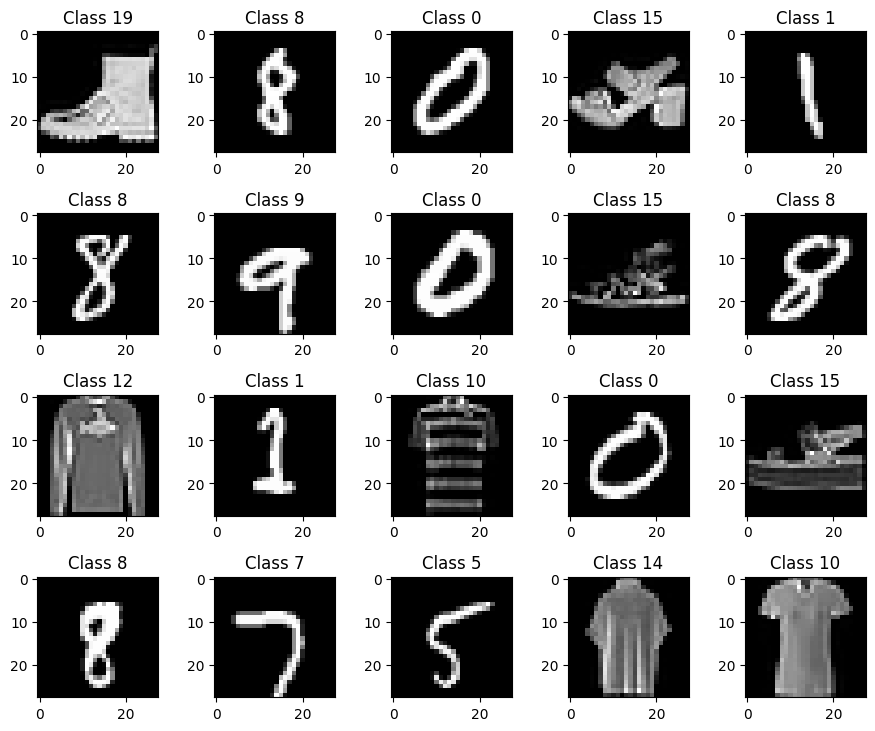

In [5]:
# Inspect images
import matplotlib.pyplot as plt
import random

plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(20):
    plt.subplot(5,5,i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

In [6]:
# Construct a convolutional neural network.
# Network should have at least one convolutional layer.

#This layer has 93% on Adam and 5 epoch

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

# Complete the code.
# [20 marks]
#Code below added by me

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Constructing a Convolutional Neural Network
model = Sequential()

# Convolutional Layer with 32 filters and a kernel size of (3,3)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# MaxPooling Layer to down-sample the spatial dimensions of the image
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten the 2D arrays for fully connected layers
model.add(Flatten())
# Fully Connected Layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))
# Dropout layer to prevent overfitting
model.add(Dropout(0.2))
# Output layer with 20 units (10 for MNIST and 10 for Fashion MNIST) and softmax activation
model.add(Dense(20, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 20)                2580      
                                                        

In [ ]:
# Train the network and save its weights in a *.hdf5 file.
# Display the training accuracy and loss at each epoch.
# [20 marks]

#Code below added by me
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

# Reshape the input data to match the input shape expected by the CNN
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28, 1))

# Callback to save the model weights after every epoch
checkpoint = ModelCheckpoint('model_weights.hdf5', monitor='loss', save_best_only=True, mode='min', verbose=1)

# Train the model
history = model.fit(x_train, y_train, epochs=14, batch_size=64, validation_split=0.2, callbacks=[checkpoint])

# Save the model architecture as JSON
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Test Loss: {:.4f}".format(test_loss))







Epoch 1/14
1085/1500 [====================>.........] - ETA: 14s - loss: 1.2453 - accuracy: 0.7547

In [ ]:
# Test the network.
# Load model from the saved .hdf5 file.
# Evaluate the model's accuracy.
# Full marks when test accuracy is greater than 90%;
# 90% of marks when test accuracy is greater than 80% but less than 90%;
# 80% of marks when test accuracy is greater than 70% but less than 80%.
# 1 bonus mark when test accuracy is greater than 95%.
# [10 + 1 marks]
from tensorflow.keras.models import model_from_json

# Load the model architecture from JSON file
with open('model.json', 'r') as json_file:
    loaded_model_json = json_file.read()

loaded_model = model_from_json(loaded_model_json)

# Load the saved weights into the model
loaded_model.load_weights('model_weights.hdf5')

# Compile the loaded model (ensure you compile with the same optimizer and loss as during training)
loaded_model.compile(optimizer= optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Reshape the test data (if necessary)
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28, 1))

# Evaluate the loaded model on the test data
test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))
print("Test Loss: {:.4f}".format(test_loss))




625/625 [==============================] - 4s 6ms/step - loss: 0.6178 - accuracy: 0.8120
Test Accuracy: 81.20%
Test Loss: 0.6178
Well done! You earned 8 marks!
